In [1]:
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as psy
import geopandas as gpd
import pysal 

In [2]:
%matplotlib inline
raptors = gpd.read_file("geopandas/data/Raptor_Nests.shp")
raptors.head(10)

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
5,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (-104.79963 40.15712)
6,5.0,40.271203,-104.740819,2011-01-06,Swainsons Hawk,INACTIVE NEST,5,POINT (-104.66790 40.26382)
7,6.0,40.357587,-104.737632,2011-01-06,Swainsons Hawk,ACTIVE NEST,6,POINT (-104.67679 40.30686)
8,7.0,40.359660,-104.730698,2011-01-06,Swainsons Hawk,FLEDGED NEST,7,POINT (-104.69146 40.31360)
9,8.0,40.358919,-104.725179,2011-01-06,Red-tail Hawk,INACTIVE NEST,8,POINT (-104.67825 40.41094)


<Axes: >

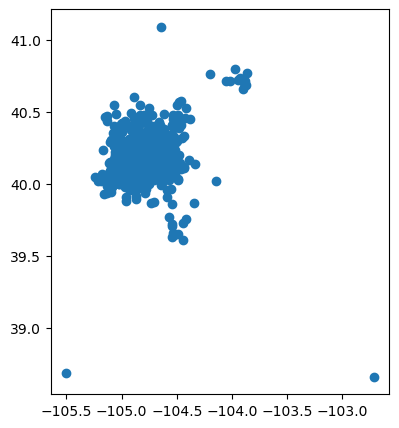

In [3]:
raptors.plot(figsize=(5,5))

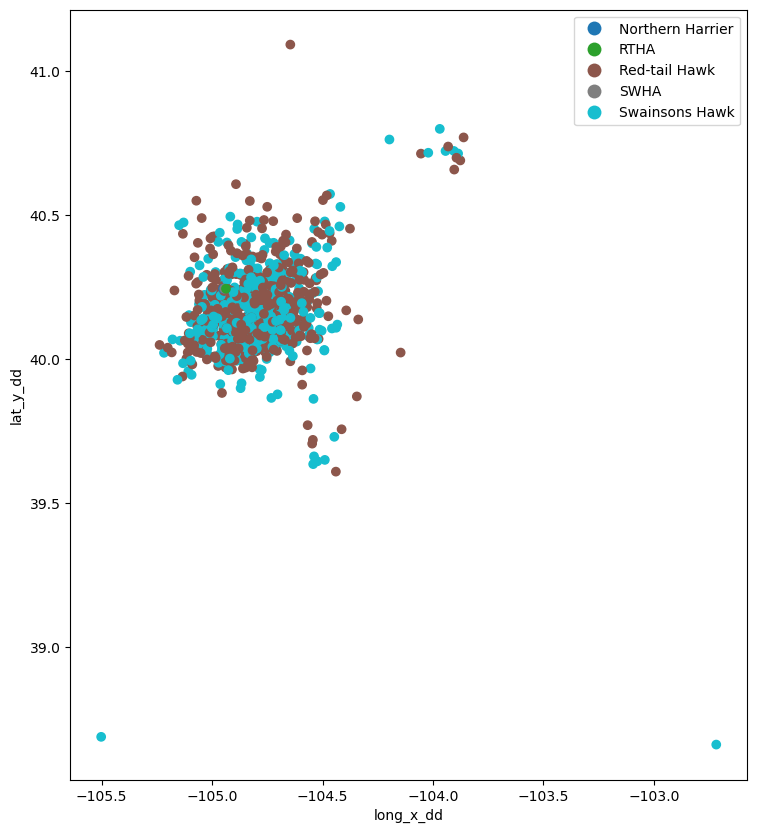

In [4]:
# View the map with colors determined by column values

ax = raptors.plot(column="recentspec", legend=True, figsize=(10,10))

ax.set_xlabel("long_x_dd")  # replace 'X-axis label' with your desired x-axis label
ax.set_ylabel("lat_y_dd")  # replace 'Y-axis label' with your desired y-axis label

plt.show()

In [5]:
raptors.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  876 non-null    float64 
 1   lat_y_dd    877 non-null    float64 
 2   long_x_dd   877 non-null    float64 
 3   lastsurvey  878 non-null    object  
 4   recentspec  879 non-null    object  
 5   recentstat  879 non-null    object  
 6   Nest_ID     879 non-null    int64   
 7   geometry    879 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 55.1+ KB


In [6]:
raptors.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
raptors_utm = gpd.read_file("geopandas/data/Raptor_UTM.shp")
raptors_utm.head(10)

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,longitude,latitude,fledglings,geometry
0,361,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,-104.79595,40.29891,8,POINT (517341.469 4460954.136)
1,362,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,-104.78897,40.22089,9,POINT (517955.287 4452295.669)
2,1,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,-105.50223,38.68694,9,POINT (456319.911 4282156.577)
3,2,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,-104.84889,40.35215,1,POINT (512832.202 4466854.573)
4,3,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,-104.74466,40.18571,7,POINT (521736.598 4448400.797)
5,4,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,-104.79963,40.15712,5,POINT (517064.264 4445215.481)
6,5,40.271203,-104.740819,2011-01-06,Swainsons Hawk,INACTIVE NEST,5,-104.66790,40.26382,5,POINT (528238.586 4457092.220)
7,6,40.357587,-104.737632,2011-01-06,Swainsons Hawk,ACTIVE NEST,6,-104.67679,40.30686,10,POINT (527465.239 4461866.694)
8,7,40.359660,-104.730698,2011-01-06,Swainsons Hawk,FLEDGED NEST,7,-104.69146,40.31360,1,POINT (526216.026 4462610.364)
9,8,40.358919,-104.725179,2011-01-06,Red-tail Hawk,INACTIVE NEST,8,-104.67825,40.41094,0,POINT (527299.162 4473418.853)


In [8]:

raptors_utm.crs


<Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

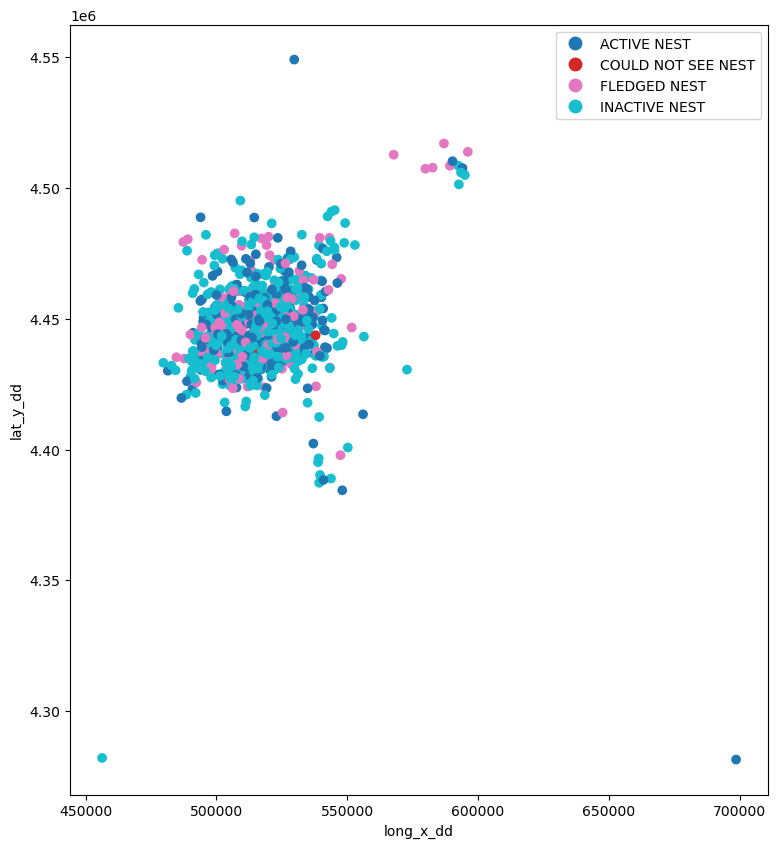

In [9]:
ax = raptors_utm.plot(column="recentstat", legend=True, figsize=(10,10))

ax.set_xlabel("longitude")  # replace 'X-axis label' with your desired x-axis label
ax.set_ylabel("latitude")  # replace 'Y-axis label' with your desired y-axis label

plt.show()